In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Funding acticity is excited recently. Especailly, recently internet makes funding activity more convinient and efficieny. 
Many countires have a lot of funding activities, you can check link.
https://public.tableau.com/profile/cs109fas#!/vizhome/cs109_fund_pic1_organization_worldwide/Sheet1
Also, some cities have more fundting activities then others
https://public.tableau.com/profile/cs109fas#!/vizhome/cs109_fund_pic1_city_people/Sheet1.


For funding, it firstly reminds us some inspiring stories. Like, apple got its first angel fund from Mike Markkula in 1977. How those investors to put their bet? How those people sussceffuly got money from those investors?

Idealy,we believe idea, technology, and team should be the key point for funding hunting. So there is no bias in terms of funding month, funding year, funding quarter, investor, and investment region. 

However, we are interested in the bias in funding activity. 

The experiment has three parts. First, I will introduce top investors and its relative information. Second, I will run a ols regression model to select features which impact funding result. Thirdly, I use hinge regression to test the accuracy of the model, and test the accuracy of prediction of funding.



In [3]:
# I in put data from CSV file nameed investments.csv, which I got from CrunchBase 
invest=pd.read_csv("C:\Users\peimo\hw5\DataScienceMp109-2015hw\investments.csv")
invest.head()

C:\Users\peimo\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/apple,Apple,Computers|Consumer Electronics|Electronics|Har...,USA,CA,SF Bay Area,Cupertino,/person/mike-markkula,Mike Markkula,NaN,NaN,NaN,NaN,/funding-round/17f74f050394203dd6717c0faaf90c55,seed,NaN,5/15/1977,1977-05,1977-Q2,1977,250000
1,/organization/abo-data,ABO Data,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,ITA,NaN,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1/1/1979,1979-01,1979-Q1,1979,1000000
2,/organization/abo-data,ABO Data,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,ITA,NaN,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1/1/1979,1979-01,1979-Q1,1979,1000000
3,/organization/bds-incorporated,"BDS, Incorporated",NaN,NaN,NaN,NaN,NaN,/organization/j-hunt-holdings,J. Hunt Holdings,NaN,NaN,NaN,NaN,/funding-round/42da1c3647491acac5ba2cd0140d6eff,venture,NaN,3/20/1982,1982-03,1982-Q1,1982,NaN
4,/organization/ikro,Ikro,Automotive|Heavy Industry|Manufacturing,BRA,23,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,NaN,NaN,NaN,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,6/1/1982,1982-06,1982-Q2,1982,724000


In [4]:
# generate quarter: to change into adapt format
quarter=[]
for i in range(len(invest['funded_quarter'])):
    a=invest['funded_quarter'][i].split('-')
    quarter.append(a[1])
len(quarter)

168647

In [5]:
# generate month: to change into adapt format
month=[]
for i in range(len(invest['funded_month'])):
    b=invest['funded_month'][i].split('-')
    month.append(b[1])
    
len(month)

168647

In [6]:
invest_new=invest
invest_new['funded_month']=month
invest_new['funded_quarter']=quarter

In [7]:
# drop unit with nah
invest_new=invest_new.dropna(axis=0, how='any')
# cleaning data for raised_amount_usd is '-   '
invest_new = invest_new[invest_new.raised_amount_usd != ' -   ']
invest_new = invest_new[invest_new.investor_region != 'Levis']
invest_new = invest_new[invest_new.investor_region != 'Quebec City']
invest_new = invest_new[invest_new.investor_name != 'Novo Ventures']
invest_new = invest_new[invest_new.investor_country_code == 'USA']

In [8]:
invest_new.head(5)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
19,/organization/cisco,Cisco,Communications Infrastructure|Data Center Infr...,USA,CA,SF Bay Area,San Jose,/organization/sequoia-capital,Sequoia Capital,USA,CA,SF Bay Area,Menlo Park,/funding-round/b9911ec2e19ad490dcdeb2d0d1a87c97,venture,A,1/1/1987,01,Q1,1987,2500000
47,/organization/marketwired,Marketwired,Advertising,CAN,ON,Toronto,Toronto,/organization/hummer-winblad-venture-partners,HWVP,USA,CA,SF Bay Area,San Francisco,/funding-round/21db75043beb906b60235ca557f2d375,venture,A,11/30/1990,11,Q4,1990,17550000
48,/organization/marketwired,Marketwired,Advertising,CAN,ON,Toronto,Toronto,/organization/mindful-investors,Mindfull Investors,USA,CA,SF Bay Area,Mill Valley,/funding-round/21db75043beb906b60235ca557f2d375,venture,A,11/30/1990,11,Q4,1990,17550000
49,/organization/marketwired,Marketwired,Advertising,CAN,ON,Toronto,Toronto,/organization/montreaux-equity-partners,Montreux Equity Partners,USA,CA,SF Bay Area,San Francisco,/funding-round/21db75043beb906b60235ca557f2d375,venture,A,11/30/1990,11,Q4,1990,17550000
50,/organization/marketwired,Marketwired,Advertising,CAN,ON,Toronto,Toronto,/organization/osprey-ventures,Osprey Ventures,USA,CA,SF Bay Area,Palo Alto,/funding-round/21db75043beb906b60235ca557f2d375,venture,A,11/30/1990,11,Q4,1990,17550000


In [9]:
# extract the columns we are interested 
raised_amount_usd=[]
funded_year=[]
funded_quarter=[]
funded_month=[]
funded_year=[]

investor_name=[]
investor_city=[]
investor_region=[]
for i in (invest_new.raised_amount_usd.index):
    raised_amount_usd.append(int(invest_new.raised_amount_usd[i]))
    funded_year.append(invest_new.funded_year[i])
    funded_quarter.append(invest_new.funded_quarter[i])
    funded_month.append(int(invest_new.funded_month[i]))
    
    investor_name.append(invest_new.investor_name[i])
    investor_city.append(invest_new.investor_city[i])
    investor_region.append(invest_new.investor_region[i])

In [10]:
# make dict by incorporating data above
invest_new_1={}
invest_new_1['raised_amount_usd']=raised_amount_usd
invest_new_1['funded_year']=funded_year
invest_new_1['funded_quarter']=funded_quarter
invest_new_1['funded_month']=funded_month

invest_new_1['investor_name']=investor_name
invest_new_1['investor_city']=investor_city
invest_new_1['investor_region']=investor_region
# invest_new_1

In [11]:
invest_new_1=pd.DataFrame(invest_new_1)
invest_new_1.head(5)

,funded_month,funded_quarter,funded_year,investor_city,investor_name,investor_region,raised_amount_usd
0,1,Q1,1987,Menlo Park,Sequoia Capital,SF Bay Area,2500000
1,11,Q4,1990,San Francisco,HWVP,SF Bay Area,17550000
2,11,Q4,1990,Mill Valley,Mindfull Investors,SF Bay Area,17550000
3,11,Q4,1990,San Francisco,Montreux Equity Partners,SF Bay Area,17550000
4,11,Q4,1990,Palo Alto,Osprey Ventures,SF Bay Area,17550000


We first take at who and where those funding activities frequently happen. Here is a link from tableau 
https://public.tableau.com/profile/cs109fas#!/vizhome/cs109_fund_pic1_city_people/Sheet1

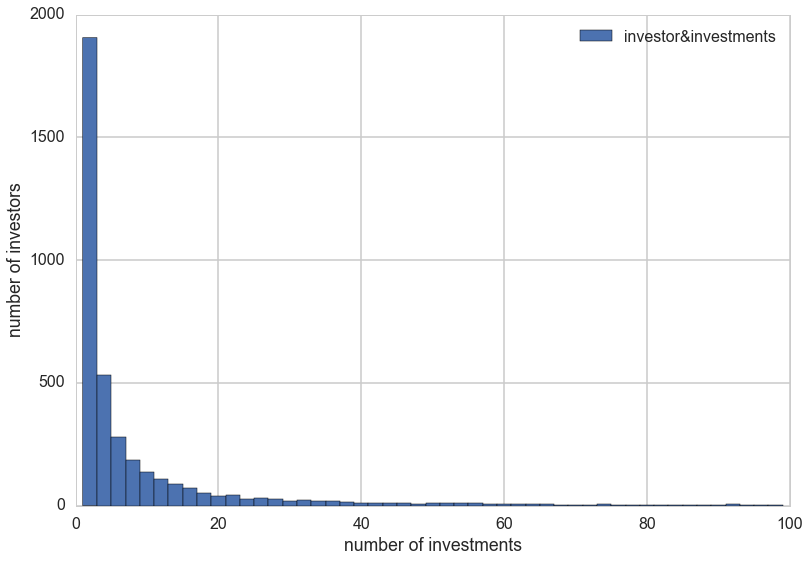

In [12]:
# we first plot total fund group by invest,
c=invest_new_1.groupby('investor_name').funded_month.count()
plt.hist(c.values, bins=np.arange(1,100,2), alpha=1,label="investor&investments");

plt.xlabel('number of investments')
plt.ylabel('number of investors')

plt.legend();

From graph above, we can most of investors made less then 20 investments.Specifically, there is a big chuck investors made less than five investments. On the other hand, there is a few investor made more than 70 investments. 

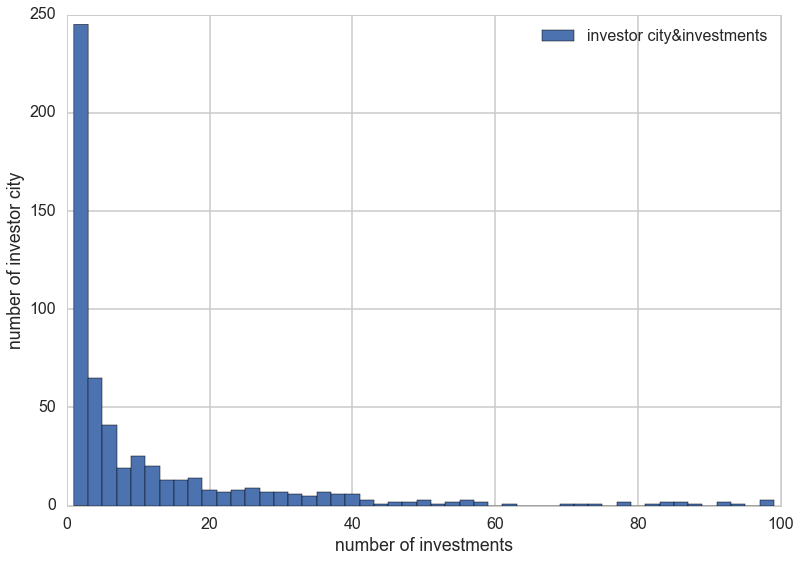

In [13]:
# we first plot total fund group by quarter,
c=invest_new_1.groupby('investor_city').funded_month.count()
plt.hist(c.values, bins=np.arange(1,100,2), alpha=1,label="investor city&investments");

plt.xlabel('number of investments')
plt.ylabel('number of investor city')

plt.legend();

From graph above, we can most of cityies have less then 40 investments.Specifically, there is a big chuck cities have less than ten investments. On the other hand, there is a few cities made more than 80 investments. 

In [14]:
investor_name_grp=invest_new_1.groupby('investor_name')
investor_name_grp_fund=investor_name_grp.raised_amount_usd.mean()

nldf=invest_new_1.copy()

nldf.set_index(['investor_name'], inplace=True)
nldf['investor_grp_fund_mean']=investor_name_grp_fund
nldf.reset_index(inplace=True)

In [15]:
nldf.head()
# nldf_new=nldf.sort(['investor_name_grp_fund'], ascending=[0])
# sorted(nldf.investor_name_grp_fund, reverse=True)

,investor_name,funded_month,funded_quarter,funded_year,investor_city,investor_region,raised_amount_usd,investor_grp_fund_mean
0,Sequoia Capital,1,Q1,1987,Menlo Park,SF Bay Area,2500000,25708996
1,HWVP,11,Q4,1990,San Francisco,SF Bay Area,17550000,14601676
2,Mindfull Investors,11,Q4,1990,Mill Valley,SF Bay Area,17550000,6774208
3,Montreux Equity Partners,11,Q4,1990,San Francisco,SF Bay Area,17550000,28124545
4,Osprey Ventures,11,Q4,1990,Palo Alto,SF Bay Area,17550000,7462500


In [16]:
investor_name=[]
investor_fund=[]
for i in range(len(investor_name_grp_fund)):
    investor_name.append(investor_name_grp_fund.index[i])
    investor_fund.append(investor_name_grp_fund[i])

In [17]:
dict_investor={}
dict_investor['name']=investor_name
dict_investor['fund']=investor_fund

investor_name_fund=pd.DataFrame(dict_investor)
investor_name_fund.head()

,fund,name
0,13886471,.406 Ventures
1,1687500,10X Venture Partners
2,6000000,1440 Foundation
3,960000,1776 Ventures
4,2900000,1to1 Venture Partners


In [18]:
investor_name_fund = investor_name_fund[investor_name_fund.name != '...']
investor_name_fund.head()

,fund,name
0,13886471,.406 Ventures
1,1687500,10X Venture Partners
2,6000000,1440 Foundation
3,960000,1776 Ventures
4,2900000,1to1 Venture Partners


In [19]:
# filter and sort top 100 investors
investor_name_fund_sort = investor_name_fund.sort(['fund'], ascending=[0])
investor_name_fund_sort_target=investor_name_fund_sort.head(100)
investor_name_fund_sort_target

,fund,name
1938,542000000,Legendary Entertainment
1992,508333333,Lone Pine Capital
1628,500000000,Hughes Network Systems
793,500000000,Coca-Cola Founders
1516,441500000,HDS Capital
1711,358500000,Innovation Department
1554,355000000,Harvard Management Company
390,327657292,Baroda Ventures
380,325000000,Balyasny Asset Management
1213,308333333,Falcon Edge Capital


In [20]:
c1=investor_name_fund_sort_target
# set index to name
c2=c1.set_index(['name'])
c2.index

Index([u'Legendary Entertainment', u'Lone Pine Capital', u'Hughes Network Systems', u'Coca-Cola Founders', u'HDS Capital', u'Innovation Department', u'Harvard Management Company', u'Baroda Ventures', u'Balyasny Asset Management', u'Falcon Edge Capital', u'The Skoll Foundation', u'Major League Soccer', u'EDS (Electronic Data Systems)', u'21st Century Fox', u'Madison Dearborn Partners', u'Microsoft Corporation - Strategic Investments', u'TA Associates', u'Uber', u'Fidelity Investments', u'TPG',
       u'Silver Lake Partners', u'ABG Capital', u'Valiant Capital Partners', u'Starbucks', u'York Capital Management', u'BlackRock', u'Alaska Permanent Fund', u'DST Global Solutions', u'JP Morgan Chase & Co.', u'Major League Baseball Ventures', u'T. Rowe Price', u'Icahn Enterprises', u'Glade Brook Capital Partners', u'Valor Equity Partners', u'blisce/', u'Founders Circle Capital', u'Jefferies Group', u'Wellington Management', u'Riverstone Holdings', u'Thoma Cressey Equity Partners', u'Keybank',
  

In [21]:
investor_grp_fund_mean=[]
raised_amount_usd=[]
funded_year=[]
funded_quarter=[]
funded_month=[]
funded_year=[]

investor_name=[]
investor_city=[]
investor_region=[]
for i in (nldf.raised_amount_usd.index):
    if nldf['investor_name'][i] in c2.index:
        raised_amount_usd.append(int(nldf.raised_amount_usd[i]))
        investor_grp_fund_mean.append(int(nldf.investor_grp_fund_mean[i]))        
        funded_year.append(nldf.funded_year[i])
        funded_quarter.append(nldf.funded_quarter[i])
        funded_month.append(nldf.funded_month[i])

        investor_name.append(nldf.investor_name[i])
        investor_city.append(nldf.investor_city[i])
        investor_region.append(nldf.investor_region[i])

In [26]:
invest_top_investor={}
invest_top_investor['investor_name']=investor_name
invest_top_investor['investor_city']=investor_city
invest_top_investor['investor_region']=investor_region

invest_top_investor['investor_grp_fund_mean']=investor_grp_fund_mean
invest_top_investor['log_raised_amount_usd']=np.log(raised_amount_usd)
invest_top_investor['raised_amount_usd']=raised_amount_usd
invest_top_investor['funded_year']=funded_year
invest_top_investor['funded_quarter']=funded_quarter
invest_top_investor['funded_month']=funded_month

invest_top_investor=pd.DataFrame(invest_top_investor)

In [27]:
# number of records comparison: original number of records VS (fitlerred)top 200 investor records
len(nldf),len(invest_top_investor)

(46444, 763)

In [29]:
invest_top_investor.head()

,funded_month,funded_quarter,funded_year,investor_city,investor_grp_fund_mean,investor_name,investor_region,log_raised_amount_usd,raised_amount_usd
0,3,Q1,2000,New York,89940000,Morgan Stanley Venture Partners,New York City,17.798924,53700000
1,4,Q2,2000,San Francisco,88483333,Capital Group,SF Bay Area,18.420681,100000000
2,4,Q2,2000,Chicago,289666666,Madison Dearborn Partners,Chicago,18.420681,100000000
3,4,Q2,2000,Berwyn,100000000,Vertex Inc.,Philadelphia,18.420681,100000000
4,6,Q2,2000,New York,85534612,General Atlantic,New York City,17.989898,65000000


(1)
Invest if funded year related to log raised_amount_usd

C:\Users\peimo\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


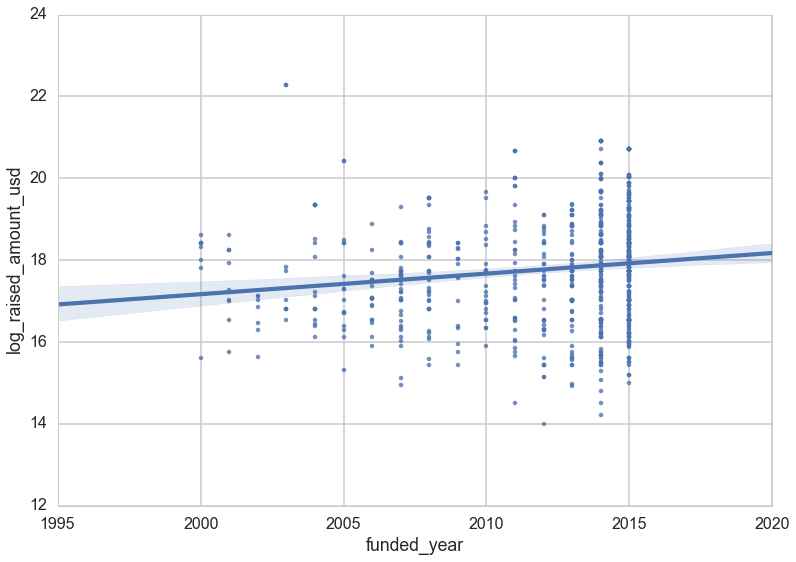

In [30]:
# I can see the relashionship between log raised_amount_usd and funded year
sns.regplot(x="funded_year", y="log_raised_amount_usd", data=invest_top_investor)

In [31]:
# run ols regression between log raised_amount_usd ~ investor_name
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

ols_model = ols('log_raised_amount_usd ~ funded_year', invest_top_investor).fit()
ols_model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_raised_amount_usd   R-squared:                       0.021
Model:                               OLS   Adj. R-squared:                  0.019
Method:                    Least Squares   F-statistic:                     16.12
Date:                   Thu, 10 Dec 2015   Prob (F-statistic):           6.52e-05
Time:                           21:23:08   Log-Likelihood:                -1292.9
No. Observations:                    763   AIC:                             2590.
Df Residuals:                        761   BIC:                             2599.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -83.3874     25.193     -3.310      0.001      -132.843   -33.932
funded_year     0.0503      0.013      4.015      0.000         0.026     0.075
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.416
Skew:                           0.134   Prob(JB):                        0.299
Kurtosis:                       3.062   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(2)
Invest if funded invsestor related to log raised_amount_usd

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

ols_model = ols('log_raised_amount_usd ~ investor_name', invest_top_investor).fit()
ols_model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_raised_amount_usd   R-squared:                       0.291
Model:                               OLS   Adj. R-squared:                  0.185
Method:                    Least Squares   F-statistic:                     2.752
Date:                   Thu, 10 Dec 2015   Prob (F-statistic):           2.82e-14
Time:                           21:23:09   Log-Likelihood:                -1169.5
No. Observations:                    763   AIC:                             2539.
Df Residuals:                        663   BIC:                             3003.
Df Model:                             99                                         
Covariance Type:               nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         19.5193      1.202     16.237      0.000        17.159    21.880
investor_name[T.360networks]                                      -0.9163      1.700     -0.539      0.590        -4.255     2.422
investor_name[T.ABG Capital]                                      -0.8636      1.472     -0.587      0.558        -3.755     2.027
investor_name[T.AES Corporation]                                  -1.0986      1.700     -0.646      0.518        -4.437     2.240
investor_name[T.AITV (Accelerate IT Ventures)]                    -2.7141      1.242     -2.186      0.029        -5.152    -0.276
investor_name[T.Alaska Permanent Fund]                            -0.6201      1.472     -0.421      0.674        -3.511     2.271
investor_name[T.Allco Renewable Energy]                           -0.8286      1.700     -0.487      0.626        -4.167     2.510
investor_name[T.Altpoint Ventures]                                -2.6577      1.298     -2.047      0.041        -5.207    -0.108
investor_name[T.American Capital Strategies]                      -2.1265      1.472     -1.444      0.149        -5.017     0.765
investor_name[T.Arrowpoint Partners]                              -0.9927      1.344     -0.739      0.460        -3.632     1.646
investor_name[T.Aspiration Growth]                                -1.1269      1.472     -0.765      0.444        -4.018     1.764
investor_name[T.Avenue Capital Group]                             -1.4130      1.388     -1.018      0.309        -4.139     1.313
investor_name[T.Balyasny Asset Management]                         0.0800      1.700      0.047      0.962        -3.258     3.418
investor_name[T.Banyan Mezzanine Funds]                           -1.7006      1.472     -1.155      0.248        -4.592     1.190
investor_name[T.Baroda Ventures]                                  -3.2704      1.242     -2.634      0.009        -5.708    -0.833
investor_name[T.Beecken Petty O'Keefe & Company]                  -1.7006      1.472     -1.155      0.248        -4.592     1.190
investor_name[T.BlackRock]                                        -1.3552      1.244     -1.089      0.277        -3.799     1.088
investor_name[T.Blue Mountain Capital Management]                 -1.0986      1.700     -0.646      0.518        -4.437     2.240
investor_name[T.Capital Group]                                    -1.4681      1.298     -1.131      0.259        -4.018     1.081
investor_name[T.Ciena]                                            -1.2849      1.700     -0.756      0.450        -4.623     2.053
investor_name[T.ClearBridge Investmen

(3)
testing year and investor togather

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

ols_model = ols('log_raised_amount_usd ~ investor_name+funded_year', invest_top_investor).fit()
ols_model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     log_raised_amount_usd   R-squared:                       0.307
Model:                               OLS   Adj. R-squared:                  0.203
Method:                    Least Squares   F-statistic:                     2.939
Date:                   Thu, 10 Dec 2015   Prob (F-statistic):           3.04e-16
Time:                           21:23:10   Log-Likelihood:                -1160.7
No. Observations:                    763   AIC:                             2523.
Df Residuals:                        662   BIC:                             2992.
Df Model:                            100                                         
Covariance Type:               nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       -108.6094     32.561     -3.336      0.001      -172.545   -44.673
investor_name[T.360networks]                                      -0.0261      1.697     -0.015      0.988        -3.358     3.306
investor_name[T.ABG Capital]                                      -0.8636      1.456     -0.593      0.553        -3.723     1.996
investor_name[T.AES Corporation]                                  -0.5899      1.687     -0.350      0.727        -3.902     2.722
investor_name[T.AITV (Accelerate IT Ventures)]                    -2.6632      1.228     -2.168      0.030        -5.075    -0.251
investor_name[T.Alaska Permanent Fund]                            -0.5565      1.457     -0.382      0.703        -3.417     2.304
investor_name[T.Allco Renewable Energy]                           -0.3835      1.686     -0.228      0.820        -3.693     2.926
investor_name[T.Altpoint Ventures]                                -2.6259      1.285     -2.044      0.041        -5.148    -0.104
investor_name[T.American Capital Strategies]                      -1.5860      1.463     -1.084      0.279        -4.459     1.287
investor_name[T.Arrowpoint Partners]                              -0.9450      1.330     -0.711      0.478        -3.556     1.666
investor_name[T.Aspiration Growth]                                -1.1269      1.456     -0.774      0.439        -3.987     1.733
investor_name[T.Avenue Capital Group]                             -0.9467      1.378     -0.687      0.492        -3.653     1.760
investor_name[T.Balyasny Asset Management]                         0.0800      1.682      0.048      0.962        -3.222     3.382
investor_name[T.Banyan Mezzanine Funds]                           -1.6370      1.457     -1.124      0.261        -4.497     1.223
investor_name[T.Baroda Ventures]                                  -3.0118      1.230     -2.449      0.015        -5.427    -0.597
investor_name[T.Beecken Petty O'Keefe & Company]                  -0.9375      1.469     -0.638      0.524        -3.823     1.948
investor_name[T.BlackRock]                                        -1.2235      1.231     -0.994      0.321        -3.641     1.194
investor_name[T.Blue Mountain Capital Management]                 -0.6535      1.686     -0.388      0.698        -3.963     2.656
investor_name[T.Capital Group]                                    -0.9382      1.292     -0.726      0.468        -3.474     1.598
investor_name[T.Ciena]                                            -0.3947      1.697     -0.233      0.816        -3.727     2.937
investor_name[T.ClearBridge Investmen

When compare the moel with predictors of year and investors and only investors. The R squared incraeses from 0.291 t0 0.307. And the adj rsquare decreases from 0.185 to 0.203. Those tow results means model of year and investors makes better job then the model only having investors. 